
0: 416x736 3 persons, 6.7ms
Speed: 2.7ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 736)


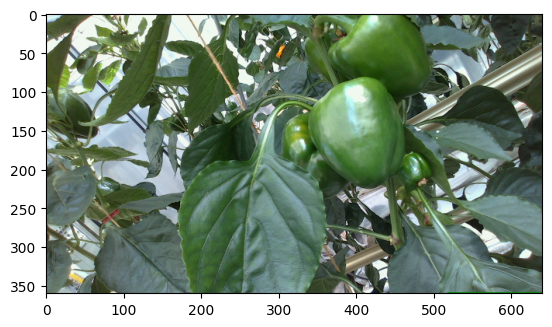

In [32]:
import cv2
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import copy

model = YOLO("../model/best.pt") # TODO: device=self.device
cv_image = cv2.imread("../example_data/3.png")
results = model.track(cv_image, retina_masks=True, conf=0.75, iou=0.5, persist=True)

plt.imshow(cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB))

In [59]:
# 1 image input -> 1 result output
result = results[0]
result

ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes', 'masks']
masks: ultralytics.yolo.engine.results.Masks object
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'piz

In [49]:
result.boxes.id

tensor([1., 2., 3.])

In [102]:
result.boxes.conf

tensor([0.9210, 0.9199, 0.9195])

In [101]:
result.boxes.cls

tensor([0., 0., 0.])

In [60]:
result.orig_shape

(360, 640)

tensor([[365.2090,   0.0000, 496.1898, 111.5531],
        [303.9875, 128.4915, 390.3026, 239.8840],
        [338.8499,  81.7119, 465.7611, 227.6666]])

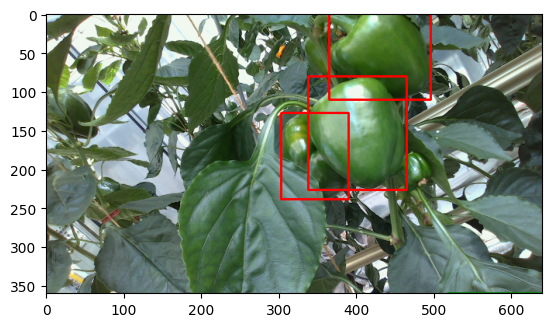

In [73]:
# Top-left is zero.

tmp_img = copy.deepcopy(result.orig_img)
for x1,y1,x2,y2 in result.boxes.xyxy:
  tmp_img = cv2.rectangle(tmp_img, (int(x1),int(y1)), (int(x2),int(y2)), (0,0,255), 2)
plt.imshow(cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB))
result.boxes.xyxy

tensor([[430.6994,  55.7766, 130.9808, 111.5531],
        [347.1451, 184.1878,  86.3151, 111.3925],
        [402.3055, 154.6893, 126.9113, 145.9547]])

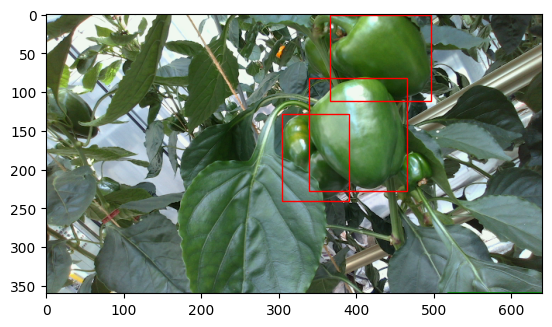

In [98]:
# result.boxes.xywh -> xy: center position of the box

fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(result.orig_img, cv2.COLOR_BGR2RGB))

for x,y,w,h in result.boxes.xywh:
  rect = patches.Rectangle((x - w/2, y - h/2), w, h, linewidth=1, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

result.boxes.xywh

result.masks.data.shape: torch.Size([3, 360, 640])


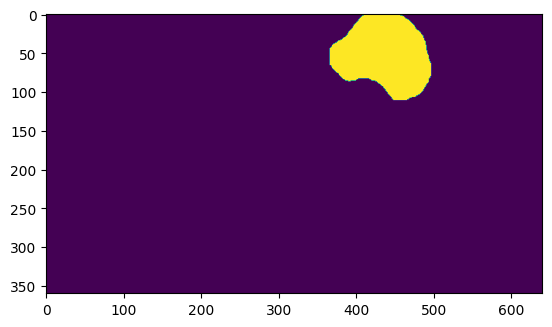

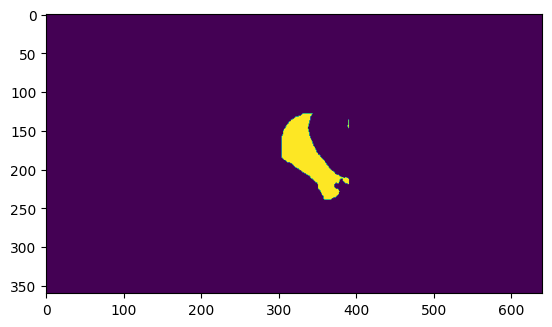

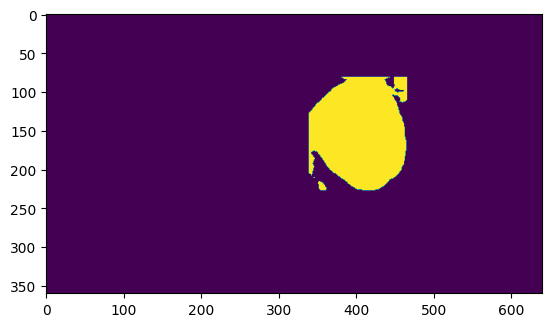

In [120]:
print("result.masks.data.shape:", result.masks.data.shape)

for mask in result.masks.data.detach().cpu():
    plt.imshow(mask)
    plt.show()